# gene expression

In [1]:
import scanpy as sc
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from hilearn import ROC_plot, CrossValidation
from sklearn.metrics import roc_auc_score
import numpy as np
import pandas as pd

In [2]:
expadata=sc.read('/mnt/ruiyanhou/nfs_share2/three_primer/ESCC/ERCC_part/ERCC_gene_exp.h5ad')
expadata

/mnt/ruiyanhou/nfs_share2/conda_env/envs/Py39/lib/python3.9/site-packages/anndata-0.10.3-py3.9.egg/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 89313 × 62700
    obs: 'patient', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'RNA_snn_res.2.6', 'seurat_clusters', 'celltype', 'PatientType', 'SampleType', 'stage'
    var: 'gene_ids', 'feature_types', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'celltype_colors', 'hvg', 'log1p', 'raw_count'
    obsm: 'X_umap'

In [3]:
celltypedict={}
for celltype in ['B_cells','Cycling_cells','Endothelial_cells','Epithelial_cell','Fibroblasts','Myeloid_cells','Plasma_cells','Smooth_muscle_cells','T_cells']:
    inputfile='/mnt/ruiyanhou/nfs_share2/three_primer/ESCC/ERCC_part/run_second_Brie/brie_ESCC_'+celltype+'.h5ad'
    adata=sc.read(inputfile)
    print(adata)
    print(adata.shape[0])
    if adata.shape[0]>500:
    
        signinputfile='/mnt/ruiyanhou/nfs_share2/three_primer/ESCC/ERCC_part/run_BRIE/Brie_out/brie_ERCC_'+celltype+'.brie_ident.tsv'
        signdf=pd.read_csv(signinputfile,delimiter='\t')    
        signdf=signdf[signdf['disease_Tumor_FDR']<0.01]
        signdf
        
        signadata=adata[:,adata.var.index.isin(signdf['GeneID'])]
        signadata
        
        psidf=pd.DataFrame(signadata.layers['Psi'],columns=signadata.var['gene_name'],index=signadata.obs.index)
        psidf
        

        signexpadata=expadata[expadata.obs.index.isin(psidf.index),expadata.var.index.isin(signadata.var['gene_name'])]
        signexpadata

        expdf=pd.DataFrame(signexpadata.X.toarray(),signexpadata.obs.index,signexpadata.var.index)
        allfeaturedf=pd.concat([psidf,expdf],axis=1)

        patientdf=pd.DataFrame(signadata.obs['SampleType'])
        df=pd.concat([expdf,patientdf],axis=1)
        df

        
        df['SampleType']=df['SampleType'].replace({'Tumor':1,'Normal':0})
        df
        print(df.shape)
        

        
        LogisticRegression = linear_model.LogisticRegression(solver='lbfgs')
        
        X1=np.array(df.iloc[:,:-1])
        X1
        
        print(X1.shape)
        
        Y1=np.array(df['SampleType'])
        Y1
        
        CV = CrossValidation(X1, Y1)
        Y2_pre, Y2_score = CV.cv_classification(model=LogisticRegression, folds=10)
        auroc=roc_auc_score(Y1,Y2_score[:,1])

        celltypedict[celltype]=auroc

/mnt/ruiyanhou/nfs_share2/conda_env/envs/Py39/lib/python3.9/site-packages/anndata-0.10.3-py3.9.egg/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 11503 × 1669
    obs: 'patient', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'RNA_snn_res.2.6', 'seurat_clusters', 'SampleType', 'PatientType', 'celltype', 'stage'
    var: 'gene_ids', 'feature_types', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'gene_name', 'isoform1_name', 'isoform2_name', 'n_counts', 'n_counts_uniq', 'loss_gene'
    uns: 'brie_losses', 'brie_param', 'brie_version', 'celltype_colors', 'hvg', 'log1p', 'raw_count'
    obsm: 'X_umap', 'Xc'
    varm: 'cell_coeff', 'sigma'
    layers: 'Psi', 'Psi_95CI', 'Z_std', 'ambiguous', 'isoform1', 'isoform2'
11503
(11503, 159)
(11503, 158)


/mnt/ruiyanhou/nfs_share2/conda_env/envs/Py39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/mnt/ruiyanhou/nfs_share2/conda_env/envs/Py39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

AnnData object with n_obs × n_vars = 877 × 1551
    obs: 'patient', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'RNA_snn_res.2.6', 'seurat_clusters', 'SampleType', 'PatientType', 'celltype', 'stage'
    var: 'gene_ids', 'feature_types', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'gene_name', 'isoform1_name', 'isoform2_name', 'n_counts', 'n_counts_uniq', 'loss_gene'
    uns: 'brie_losses', 'brie_param', 'brie_version', 'celltype_colors', 'hvg', 'log1p', 'raw_count'
    obsm: 'X_umap', 'Xc'
    varm: 'cell_coeff', 'sigma'
    layers: 'Psi', 'Psi_95CI', 'Z_std', 'ambiguous', 'isoform1', 'isoform2'
877
(877, 31)
(877, 30)


/mnt/ruiyanhou/nfs_share2/conda_env/envs/Py39/lib/python3.9/site-packages/anndata-0.10.3-py3.9.egg/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 4214 × 1770
    obs: 'patient', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'RNA_snn_res.2.6', 'seurat_clusters', 'SampleType', 'PatientType', 'celltype', 'stage'
    var: 'gene_ids', 'feature_types', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'gene_name', 'isoform1_name', 'isoform2_name', 'n_counts', 'n_counts_uniq', 'loss_gene'
    uns: 'brie_losses', 'brie_param', 'brie_version', 'celltype_colors', 'hvg', 'log1p', 'raw_count'
    obsm: 'X_umap', 'Xc'
    varm: 'cell_coeff', 'sigma'
    layers: 'Psi', 'Psi_95CI', 'Z_std', 'ambiguous', 'isoform1', 'isoform2'
4214
(4214, 142)
(4214, 141)


/mnt/ruiyanhou/nfs_share2/conda_env/envs/Py39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/mnt/ruiyanhou/nfs_share2/conda_env/envs/Py39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

AnnData object with n_obs × n_vars = 6561 × 1800
    obs: 'patient', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'RNA_snn_res.2.6', 'seurat_clusters', 'SampleType', 'PatientType', 'celltype', 'stage'
    var: 'gene_ids', 'feature_types', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'gene_name', 'isoform1_name', 'isoform2_name', 'n_counts', 'n_counts_uniq', 'loss_gene'
    uns: 'brie_losses', 'brie_param', 'brie_version', 'celltype_colors', 'hvg', 'log1p', 'raw_count'
    obsm: 'X_umap', 'Xc'
    varm: 'cell_coeff', 'sigma'
    layers: 'Psi', 'Psi_95CI', 'Z_std', 'ambiguous', 'isoform1', 'isoform2'
6561
(6561, 245)
(6561, 244)


/mnt/ruiyanhou/nfs_share2/conda_env/envs/Py39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/mnt/ruiyanhou/nfs_share2/conda_env/envs/Py39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

AnnData object with n_obs × n_vars = 17521 × 1827
    obs: 'patient', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'RNA_snn_res.2.6', 'seurat_clusters', 'SampleType', 'PatientType', 'celltype', 'stage'
    var: 'gene_ids', 'feature_types', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'gene_name', 'isoform1_name', 'isoform2_name', 'n_counts', 'n_counts_uniq', 'loss_gene'
    uns: 'brie_losses', 'brie_param', 'brie_version', 'celltype_colors', 'hvg', 'log1p', 'raw_count'
    obsm: 'X_umap', 'Xc'
    varm: 'cell_coeff', 'sigma'
    layers: 'Psi', 'Psi_95CI', 'Z_std', 'ambiguous', 'isoform1', 'isoform2'
17521
(17521, 543)
(17521, 542)


/mnt/ruiyanhou/nfs_share2/conda_env/envs/Py39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/mnt/ruiyanhou/nfs_share2/conda_env/envs/Py39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

AnnData object with n_obs × n_vars = 11048 × 1788
    obs: 'patient', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'RNA_snn_res.2.6', 'seurat_clusters', 'SampleType', 'PatientType', 'celltype', 'stage'
    var: 'gene_ids', 'feature_types', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'gene_name', 'isoform1_name', 'isoform2_name', 'n_counts', 'n_counts_uniq', 'loss_gene'
    uns: 'brie_losses', 'brie_param', 'brie_version', 'celltype_colors', 'hvg', 'log1p', 'raw_count'
    obsm: 'X_umap', 'Xc'
    varm: 'cell_coeff', 'sigma'
    layers: 'Psi', 'Psi_95CI', 'Z_std', 'ambiguous', 'isoform1', 'isoform2'
11048
(11048, 305)
(11048, 304)


/mnt/ruiyanhou/nfs_share2/conda_env/envs/Py39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/mnt/ruiyanhou/nfs_share2/conda_env/envs/Py39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

AnnData object with n_obs × n_vars = 5649 × 1698
    obs: 'patient', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'RNA_snn_res.2.6', 'seurat_clusters', 'SampleType', 'PatientType', 'celltype', 'stage'
    var: 'gene_ids', 'feature_types', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'gene_name', 'isoform1_name', 'isoform2_name', 'n_counts', 'n_counts_uniq', 'loss_gene'
    uns: 'brie_losses', 'brie_param', 'brie_version', 'celltype_colors', 'hvg', 'log1p', 'raw_count'
    obsm: 'X_umap', 'Xc'
    varm: 'cell_coeff', 'sigma'
    layers: 'Psi', 'Psi_95CI', 'Z_std', 'ambiguous', 'isoform1', 'isoform2'
5649
(5649, 146)
(5649, 145)


/mnt/ruiyanhou/nfs_share2/conda_env/envs/Py39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/mnt/ruiyanhou/nfs_share2/conda_env/envs/Py39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

AnnData object with n_obs × n_vars = 1861 × 1733
    obs: 'patient', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'RNA_snn_res.2.6', 'seurat_clusters', 'SampleType', 'PatientType', 'celltype', 'stage'
    var: 'gene_ids', 'feature_types', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'gene_name', 'isoform1_name', 'isoform2_name', 'n_counts', 'n_counts_uniq', 'loss_gene'
    uns: 'brie_losses', 'brie_param', 'brie_version', 'celltype_colors', 'hvg', 'log1p', 'raw_count'
    obsm: 'X_umap', 'Xc'
    varm: 'cell_coeff', 'sigma'
    layers: 'Psi', 'Psi_95CI', 'Z_std', 'ambiguous', 'isoform1', 'isoform2'
1861
(1861, 134)
(1861, 133)


/mnt/ruiyanhou/nfs_share2/conda_env/envs/Py39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/mnt/ruiyanhou/nfs_share2/conda_env/envs/Py39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

AnnData object with n_obs × n_vars = 28282 × 1745
    obs: 'patient', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'RNA_snn_res.2.6', 'seurat_clusters', 'SampleType', 'PatientType', 'celltype', 'stage'
    var: 'gene_ids', 'feature_types', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'gene_name', 'isoform1_name', 'isoform2_name', 'n_counts', 'n_counts_uniq', 'loss_gene'
    uns: 'brie_losses', 'brie_param', 'brie_version', 'celltype_colors', 'hvg', 'log1p', 'raw_count'
    obsm: 'X_umap', 'Xc'
    varm: 'cell_coeff', 'sigma'
    layers: 'Psi', 'Psi_95CI', 'Z_std', 'ambiguous', 'isoform1', 'isoform2'
28282
(28282, 347)
(28282, 346)


/mnt/ruiyanhou/nfs_share2/conda_env/envs/Py39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/mnt/ruiyanhou/nfs_share2/conda_env/envs/Py39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

In [4]:
# import pickle


# with open('/mnt/ruiyanhou/nfs_share2/three_primer/ESCC/ERCC_part/stage_prediction/exp_celltype_auroc.pkl','wb') as f:
#     pickle.dump(celltypedict,f)

# Gene expression +PSI

In [5]:
import scanpy as sc
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from hilearn import ROC_plot, CrossValidation
from sklearn.metrics import roc_auc_score
import numpy as np
import pandas as pd

In [6]:
expadata=sc.read('/mnt/ruiyanhou/nfs_share2/three_primer/ESCC/ERCC_part/ERCC_gene_exp.h5ad')
expadata

/mnt/ruiyanhou/nfs_share2/conda_env/envs/Py39/lib/python3.9/site-packages/anndata-0.10.3-py3.9.egg/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 89313 × 62700
    obs: 'patient', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'RNA_snn_res.2.6', 'seurat_clusters', 'celltype', 'PatientType', 'SampleType', 'stage'
    var: 'gene_ids', 'feature_types', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'celltype_colors', 'hvg', 'log1p', 'raw_count'
    obsm: 'X_umap'

In [ ]:
celltypedict={}
for celltype in ['B_cells','Cycling_cells','Endothelial_cells','Epithelial_cell','Fibroblasts','Myeloid_cells','Plasma_cells','Smooth_muscle_cells','T_cells']:
    inputfile='/mnt/ruiyanhou/nfs_share2/three_primer/ESCC/ERCC_part/run_second_Brie/brie_ESCC_'+celltype+'.h5ad'
    adata=sc.read(inputfile)
    print(adata)
    print(adata.shape[0])
    if adata.shape[0]>500:
    
        signinputfile='/mnt/ruiyanhou/nfs_share2/three_primer/ESCC/ERCC_part/run_BRIE/Brie_out/brie_ERCC_'+celltype+'.brie_ident.tsv'
        signdf=pd.read_csv(signinputfile,delimiter='\t')    
        signdf=signdf[signdf['disease_Tumor_FDR']<0.01]
        signdf
        
        signadata=adata[:,adata.var.index.isin(signdf['GeneID'])]
        signadata
        
        psidf=pd.DataFrame(signadata.layers['Psi'],columns=signadata.var['gene_name'],index=signadata.obs.index)
        psidf
        

        signexpadata=expadata[expadata.obs.index.isin(psidf.index),expadata.var.index.isin(signadata.var['gene_name'])]
        signexpadata

        expdf=pd.DataFrame(signexpadata.X.toarray(),signexpadata.obs.index,signexpadata.var.index)
        allfeaturedf=pd.concat([psidf,expdf],axis=1)

        patientdf=pd.DataFrame(signadata.obs['SampleType'])
        df=pd.concat([allfeaturedf,patientdf],axis=1)
        df

        
        df['SampleType']=df['SampleType'].replace({'Tumor':1,'Normal':0})
        df
        print(df.shape)
        

        
        LogisticRegression = linear_model.LogisticRegression(solver='lbfgs')
        
        X1=np.array(df.iloc[:,:-1])
        X1
        
        print(X1.shape)
        
        Y1=np.array(df['SampleType'])
        Y1
        
        CV = CrossValidation(X1, Y1)
        Y2_pre, Y2_score = CV.cv_classification(model=LogisticRegression, folds=10)
        auroc=roc_auc_score(Y1,Y2_score[:,1])

        celltypedict[celltype]=auroc

In [ ]:
# import pickle


# with open('/mnt/ruiyanhou/nfs_share2/three_primer/ESCC/ERCC_part/stage_prediction/celltype_auroc.pkl','wb') as f:
#     pickle.dump(celltypedict,f)

# Plot

In [7]:
import pickle
import pandas as pd

In [8]:
with open('/mnt/ruiyanhou/nfs_share2/three_primer/ESCC/ERCC_part/stage_prediction/celltype_auroc.pkl','rb') as f:
    celltypeauc=pickle.load(f)

In [9]:
celltypeauc

with open('/mnt/ruiyanhou/nfs_share2/three_primer/ESCC/ERCC_part/stage_prediction/exp_celltype_auroc.pkl','rb') as f:
    geneexpcelltypeauc=pickle.load(f)

In [10]:
geneexpcelltypeauc

psigenedf=pd.DataFrame(celltypeauc,index=[0]).T
psigenedf

,0
B_cells,0.796765
Cycling_cells,0.751107
Endothelial_cells,0.868779
Epithelial_cell,0.973452
Fibroblasts,0.965708
Myeloid_cells,0.885507
Plasma_cells,0.917306
Smooth_muscle_cells,0.909952
T_cells,0.861593


In [11]:
geneexpdf=pd.DataFrame(geneexpcelltypeauc,index=[0]).T
geneexpdf

,0
B_cells,0.714789
Cycling_cells,0.609051
Endothelial_cells,0.813199
Epithelial_cell,0.958037
Fibroblasts,0.939871
Myeloid_cells,0.830191
Plasma_cells,0.888012
Smooth_muscle_cells,0.885295
T_cells,0.797788


In [12]:
concatdf=pd.concat([psigenedf,geneexpdf],axis=1)
concatdf

,0,0
B_cells,0.796765,0.714789
Cycling_cells,0.751107,0.609051
Endothelial_cells,0.868779,0.813199
Epithelial_cell,0.973452,0.958037
Fibroblasts,0.965708,0.939871
Myeloid_cells,0.885507,0.830191
Plasma_cells,0.917306,0.888012
Smooth_muscle_cells,0.909952,0.885295
T_cells,0.861593,0.797788


In [13]:
concatdf.columns=['PSI+GEX','GEX']
concatdf

,PSI+GEX,GEX
B_cells,0.796765,0.714789
Cycling_cells,0.751107,0.609051
Endothelial_cells,0.868779,0.813199
Epithelial_cell,0.973452,0.958037
Fibroblasts,0.965708,0.939871
Myeloid_cells,0.885507,0.830191
Plasma_cells,0.917306,0.888012
Smooth_muscle_cells,0.909952,0.885295
T_cells,0.861593,0.797788


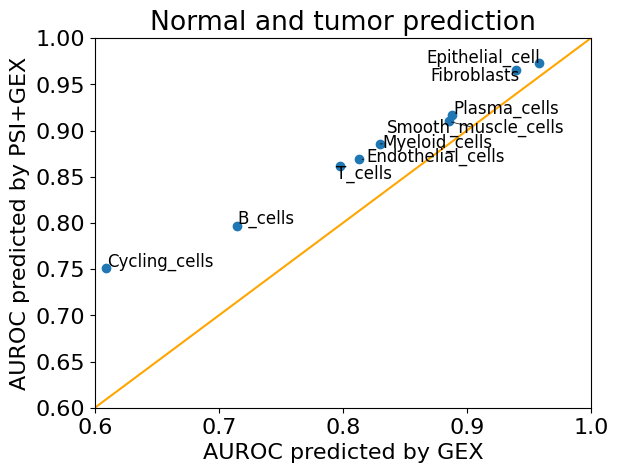

In [14]:
from adjustText import adjust_text
import matplotlib.pyplot as plt

plt.rcParams['font.size']=16

fig, ax = plt.subplots()

ax.scatter(x='GEX',y='PSI+GEX',data=concatdf)
texts=[]
for i,r in concatdf.iterrows():
    texts.append(plt.text(x=r['GEX'],y=r['PSI+GEX'],s=i,fontsize=12))
adjust_text(texts,arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

ax.axline((0, 0), slope=1,color='orange')
plt.xlabel('AUROC predicted by GEX')
plt.ylabel('AUROC predicted by PSI+GEX')
plt.xlim(0.6,1)
plt.ylim(0.6,1)
plt.title('Normal and tumor prediction')
#fig.savefig('/mnt/ruiyanhou/nfs_share2/three_primer/ESCC/ERCC_part/stage_prediction/AUROC_scatterplot.pdf',bbox_inches='tight',dpi=300)
plt.show()